In [1]:
import numpy as np

In [2]:
def load_and_center_dataset(filename):
    images = np.load(filename) # this is an n x m matrix, where n is the number of images and m is the number of features (pixels)
    images = images - np.mean(images, axis = 0)
    print(len(images), len(images[0]), np.average(images), images)
    return images

In [3]:
filename = "face_dataset.npy"

In [4]:
dataset = load_and_center_dataset(filename)
print(dataset)

13233 4096 -2.61654556892539e-15 [[-33.83971888 -37.93667347 -41.15710723 ... 108.31179627  98.29063704
   46.46474722]
 [-33.83971888 -37.93667347 -41.15710723 ... -53.68820373 -49.70936296
  -44.53525278]
 [ 20.16028112 215.06332653 210.84289277 ... 120.31179627  54.29063704
  -44.53525278]
 ...
 [-25.83971888 -29.93667347 -36.15710723 ...  25.31179627  27.29063704
   30.46474722]
 [-33.83971888 -37.93667347 -41.15710723 ... -20.68820373 -13.70936296
  -44.53525278]
 [-32.83971888 -17.93667347 -26.15710723 ... -45.68820373 -37.70936296
  -34.53525278]]
[[-33.83971888 -37.93667347 -41.15710723 ... 108.31179627  98.29063704
   46.46474722]
 [-33.83971888 -37.93667347 -41.15710723 ... -53.68820373 -49.70936296
  -44.53525278]
 [ 20.16028112 215.06332653 210.84289277 ... 120.31179627  54.29063704
  -44.53525278]
 ...
 [-25.83971888 -29.93667347 -36.15710723 ...  25.31179627  27.29063704
   30.46474722]
 [-33.83971888 -37.93667347 -41.15710723 ... -20.68820373 -13.70936296
  -44.53525278]

In [5]:
def get_covariance(dataset):
    XT = np.transpose(dataset)
    #print(np.shape(images)[0])
    cov_mat = 1/(np.shape(dataset)[0] -1) * np.dot(XT, dataset) # this is the covariance matrix
    #print(np.shape(retur))
    #print(retur)
    return cov_mat

In [6]:
S = get_covariance(dataset)
print(S)

[[3999.12659037 3878.00662669 3685.10846618 ...  840.36583133
   803.98553196  798.97341831]
 [3878.00662669 4356.64562669 4198.25178778 ...  878.67531097
   830.55935959  820.42189705]
 [3685.10846618 4198.25178778 4580.99534266 ...  879.09108407
   814.92262957  790.98467423]
 ...
 [ 840.36583133  878.67531097  879.09108407 ... 4662.51719533
  4237.06278957 3695.92234378]
 [ 803.98553196  830.55935959  814.92262957 ... 4237.06278957
  4507.89390946 4007.63161897]
 [ 798.97341831  820.42189705  790.98467423 ... 3695.92234378
  4007.63161897 4303.47776637]]


In [7]:
from scipy.linalg import eigh

In [8]:
def get_eig(S, m):
    n = np.shape(S)[0]
    # say we want the largest m eigenvalues
    eivalues, eivectors = eigh(S, subset_by_index = [n - m, n - 1])
    #print(eivalues, eivectors)
    # to reverse them, do a reverse python slice
    eivalues, eivectors = eivalues[::-1], eivectors[:, ::-1]
    # make the eivalues a diagnoal matrix like the question wants
    eivalues = np.diag(eivalues)
    return eivalues, eivectors
    # then we'd return eivalues, eivectors
    #print(eivalues)

In [9]:
lambdas, U = get_eig(S, 100)
print(U[:, 1])

[0.00164207 0.001432   0.00096843 ... 0.02955152 0.02727265 0.02459086]


In [10]:
def get_eig_prop(S, prop):
    vally = []
    lambdas = eigh(S, eigvals_only = True)
    listy = lambdas.tolist()
    total = sum(listy)
    for item in listy:
        if item / total > prop:
            vally.append(item)
    vally.sort()
    #print(vally)
    start, end = vally[0], vally[-1]
    eivalues, eivectors = eigh(S, subset_by_value = [start - 0.0001, np.inf]) # the 0.0001 is because the parameter is exclusive, inclusive and we want
    # it to be inclusive, inclusive
    eivalues, eivectors = eivalues[::-1], eivectors[:, ::-1]
    eivalues = np.diag(eivalues)
    return eivalues, eivectors
    #print(eivalues)

In [11]:
er, vecs = get_eig_prop(S, 0.07)
print(er)

[[4756883.1090128        0.        ]
 [      0.         1395990.52536811]]


In [12]:
#listy.sort()
#print(start)
#idx = listy.index(start) - 1
#start = listy[idx]
#print(start)

In [13]:
#project_image
image = dataset[50, :] # this is a sample image
print(np.shape(image))
def project_image(image, U):
    listy = [] # this will be a list of all the weights (alphas)
    for i in range(np.shape(U)[1]):
        listy.append(np.dot(image, U[:, i]))
    listy
    XiPCA = np.zeros(np.shape(image))
    for i in range(np.shape(U)[1]):
        XiPCA += listy[i] * U[:, i]
    return XiPCA

(4096,)


In [14]:
XiPCA = project_image(image, U)
print(XiPCA)

[ 15.60624806  13.40610087   7.69465154 ... -55.42334049 -56.17882804
 -47.51450167]


In [15]:
import matplotlib.pyplot as plt

In [16]:
#display_image
#images = dataset.reshape(-1, 64, 64)
def display_image(orig, proj):
    fig, (ax1, ax2) = plt.subplots(figsize=(9,3), ncols=2)
    ax1.set_title("Original")
    ax2.set_title("Projection")
    im1 = ax1.imshow(orig.reshape(64,64), aspect = "equal")
    im2 = ax2.imshow(proj.reshape(64,64), aspect = "equal")
    fig.colorbar(im1, ax = ax1, location = "right")
    fig.colorbar(im2, ax = ax2, location = "right")
    return fig, ax1, ax2

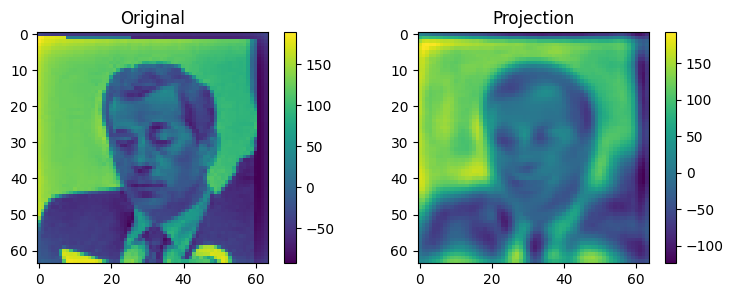

In [17]:
image = dataset[50]
projection = project_image(image, U)
fig, ax1, ax2 = display_image(image, projection)
plt.show()

In [18]:
def perturb_image(image, U, sigma):
    listyy = [] # this will be a list of all the weights (alphas)
    for i in range(np.shape(U)[1]):
        listyy.append(np.dot(image, U[:, i])+ np.random.normal(scale=sigma))
    XiPCA = np.zeros(np.shape(image))
    for i in range(np.shape(U)[1]):
        XiPCA += listyy[i] * U[:, i]
    return XiPCA

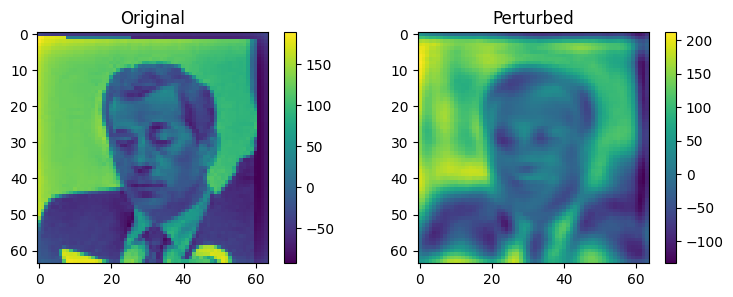

In [19]:
image = dataset[50]
fig, (ax1, ax2) = plt.subplots(figsize=(9,3), ncols=2)
ax1.set_title("Original")
ax2.set_title("Perturbed")
im1 = ax1.imshow(image.reshape(64, 64), aspect = "equal")
im2 = ax2.imshow(perturb_image(image, U, 100).reshape(64,64), aspect = "equal")
fig.colorbar(im1, ax = ax1, location = "right")
fig.colorbar(im2, ax = ax2, location = "right")
plt.show()

In [20]:
#combine_image
def combine_image(image1, image2, U, lam):
    alpha1 = [] # this will be a list of all the weights (alphas)
    for i in range(np.shape(U)[1]):
        alpha1.append(np.dot(image, U[:, i]))
    alpha2 = []
    for i in range(np.shape(U)[1]):
        alpha2.append(np.dot(image2, U[:, i]))
    # combine the two lists in the way specified
    alpha_comb = [lam*a + (1 - lam)*b for a,b in zip(alpha1, alpha2)]
    combination = np.zeros(np.shape(image))
    for i in range(np.shape(U)[1]):
        combination += alpha_comb[i] * U[:, i]
    return combination

In [21]:
combo = combine_image(image, dataset[80], U, 0.5)
combo

array([ -0.72500618, -10.37072169, -20.98641042, ..., -54.79295475,
       -52.88326845, -45.06257109])

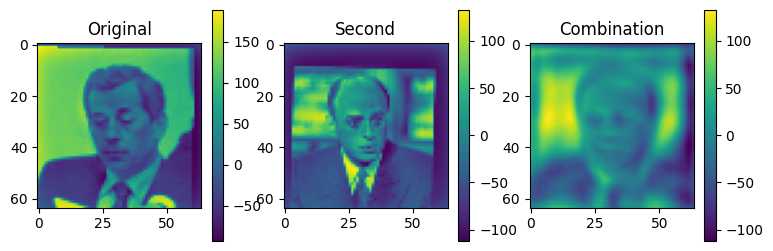

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9,3), ncols=3)
ax1.set_title("Original")
ax2.set_title("Second")
ax3.set_title("Combination")
im1 = ax1.imshow(image.reshape(64,64), aspect = "equal")
im2 = ax2.imshow(dataset[80].reshape(64,64), aspect = "equal")
im2 = ax3.imshow(combo.reshape(64,64), aspect = "equal")
fig.colorbar(im1, ax = ax1, location = "right")
fig.colorbar(im2, ax = ax2, location = "right")
fig.colorbar(im2, ax = ax3, location = "right")